In [249]:
!pip install prophet

In [250]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from prophet import Prophet 

In [251]:
apple_df = pd.read_csv("Resources/Apple_stock_history.csv")
apple_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0
1,1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0
2,1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0
3,1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0
4,1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0


In [252]:
apple_df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10348,2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300,0.0,0.0
10349,2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900,0.0,0.0
10350,2021-12-30,179.470001,180.570007,178.089996,178.199997,59773000,0.0,0.0
10351,2021-12-31,178.089996,179.229996,177.259995,177.570007,64025500,0.0,0.0
10352,2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900,0.0,0.0


In [253]:
apple_df = apple_df.drop(["Dividends","Stock Splits"], axis=1)
apple_df

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600
1,1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800
2,1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000
3,1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600
4,1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600
...,...,...,...,...,...,...
10348,2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300
10349,2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900
10350,2021-12-30,179.470001,180.570007,178.089996,178.199997,59773000
10351,2021-12-31,178.089996,179.229996,177.259995,177.570007,64025500


<Axes: >

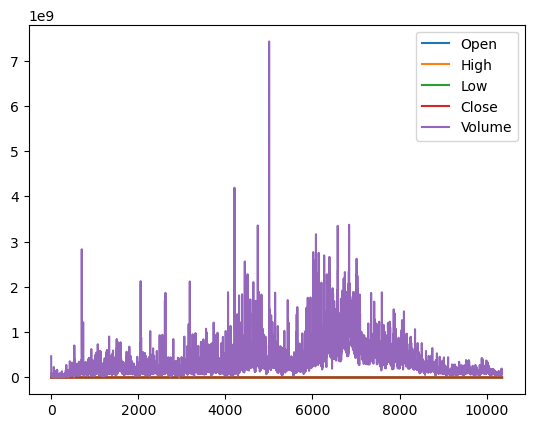

In [254]:
apple_df.plot()

In [255]:
apple_df['Date'] = pd.to_datetime(apple_df['Date'])

# Create a boolean mask for the desired date range
start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (apple_df['Date'] >= start_date) & (apple_df['Date'] <= end_date)

# Use the mask to index the DataFrame
apple_2018_df = apple_df.loc[mask]

In [256]:
apple_df['Date'] = pd.to_datetime(apple_df['Date'])

# Create a boolean mask for the desired date range
start_date = pd.to_datetime('2016-11-02')
end_date = pd.to_datetime('2017-11-01')
mask = (apple_df['Date'] >= start_date) & (apple_df['Date'] <= end_date)

# Use the mask to index the DataFrame
filtered_apple_df = apple_df.loc[mask]

In [257]:
filtered_apple_df

,Date,Open,High,Low,Close,Volume
9052,2016-11-02,26.080795,26.303207,26.040996,26.125277,113326800
9053,2016-11-03,26.115866,26.228819,25.779358,25.845247,107730400
9054,2016-11-04,25.539327,25.944079,25.440493,25.612276,123348000
9055,2016-11-07,25.904077,26.005265,25.758178,25.981733,130240000
9056,2016-11-08,25.958195,26.289998,25.814650,26.134686,97016800
...,...,...,...,...,...,...
9299,2017-10-26,37.459749,37.602700,37.352538,37.502636,68002000
9300,2017-10-27,37.950548,38.977400,37.809982,38.846363,177816800
9301,2017-10-30,39.046491,40.042370,39.005989,39.720734,178803200
9302,2017-10-31,40.001865,40.418800,39.773149,40.273468,144187200


In [258]:
apple_predict = filtered_apple_df[["Date", "Close"]]

# Rename the columns to the Prophet model syntax 
apple_predict = apple_predict.rename(columns={"Date":"ds", "Close":"y"})

# Review the Canada DataFrame
apple_predict.head()

,ds,y
9052,2016-11-02,26.125277
9053,2016-11-03,25.845247
9054,2016-11-04,25.612276
9055,2016-11-07,25.981733
9056,2016-11-08,26.134686


In [259]:
model_apple = Prophet()

In [260]:
model_apple.fit(apple_predict)

23:29:02 - cmdstanpy - INFO - Chain [1] start processing
23:29:02 - cmdstanpy - INFO - Chain [1] done processing


In [261]:
future_apple = model_apple.make_future_dataframe(periods=52, freq="W")
future_apple.tail()

,ds
299,2018-09-30
300,2018-10-07
301,2018-10-14
302,2018-10-21
303,2018-10-28


In [262]:
forecast_apple = model_apple.predict(future_apple)

forecast_apple.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-02,25.392623,24.491793,26.282230,25.392623,25.392623,-0.020010,-0.020010,-0.020010,-0.020010,-0.020010,-0.020010,0.0,0.0,0.0,25.372613
1,2016-11-03,25.430693,24.328353,26.100330,25.430693,25.430693,-0.206588,-0.206588,-0.206588,-0.206588,-0.206588,-0.206588,0.0,0.0,0.0,25.224105
2,2016-11-04,25.468763,24.401607,26.266292,25.468763,25.468763,-0.158892,-0.158892,-0.158892,-0.158892,-0.158892,-0.158892,0.0,0.0,0.0,25.309871
3,2016-11-07,25.582972,24.523935,26.332695,25.582972,25.582972,-0.197236,-0.197236,-0.197236,-0.197236,-0.197236,-0.197236,0.0,0.0,0.0,25.385737
4,2016-11-08,25.621042,24.660439,26.410927,25.621042,25.621042,-0.052023,-0.052023,-0.052023,-0.052023,-0.052023,-0.052023,0.0,0.0,0.0,25.569018


In [263]:
apple_plot_future = forecast_apple[["ds", "yhat","yhat_lower","yhat_upper"]]
apple_plot_future

,ds,yhat,yhat_lower,yhat_upper
0,2016-11-02,25.372613,24.491793,26.282230
1,2016-11-03,25.224105,24.328353,26.100330
2,2016-11-04,25.309871,24.401607,26.266292
3,2016-11-07,25.385737,24.523935,26.332695
4,2016-11-08,25.569018,24.660439,26.410927
...,...,...,...,...
299,2018-09-30,37.972845,18.836220,59.437058
300,2018-10-07,37.968797,18.706521,60.455348
301,2018-10-14,37.964750,17.981094,60.649312
302,2018-10-21,37.960702,16.973098,61.695414


<Axes: >

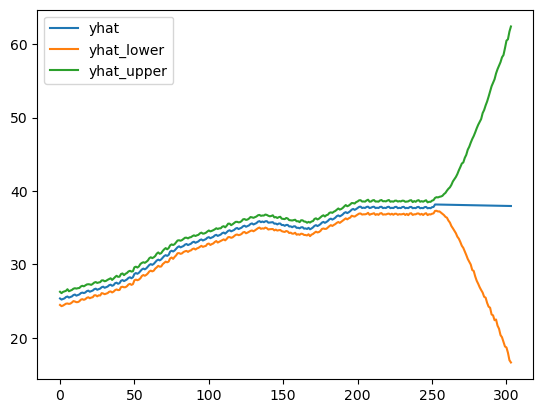

In [264]:
apple_plot_future[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].plot()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


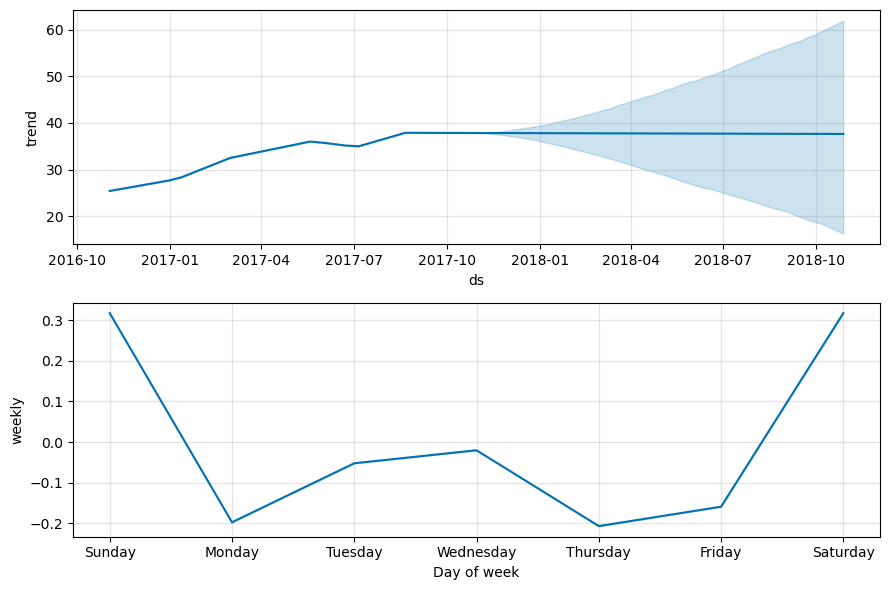

In [265]:
fig2 = model_apple.plot_components(forecast_apple)

In [337]:
apple_2018_df.head()

,Date,Open,High,Low,Close,Volume
9344,2018-01-02,40.686046,41.197730,40.470850,41.188164,102223600
9345,2018-01-03,41.252724,41.735717,41.116436,41.180992,118071600
9346,2018-01-04,41.255110,41.477479,41.145124,41.372272,89738400
9347,2018-01-05,41.470309,41.931779,41.377058,41.843311,94640000
9348,2018-01-08,41.687889,41.989160,41.587462,41.687889,82271200


In [345]:
apple_2018_filtered = apple_2018_df[["Date","Close"]]
apple_2018_filtered.head()

,Date,Close
9344,2018-01-02,41.188164
9345,2018-01-03,41.180992
9346,2018-01-04,41.372272
9347,2018-01-05,41.843311
9348,2018-01-08,41.687889


In [347]:
apple_2018_filtered.set_index("Date")

,Close
Date,
2018-01-02,41.188164
2018-01-03,41.180992
2018-01-04,41.372272
2018-01-05,41.843311
2018-01-08,41.687889
...,...
2018-12-24,35.634811
2018-12-26,38.144264
2018-12-27,37.896721


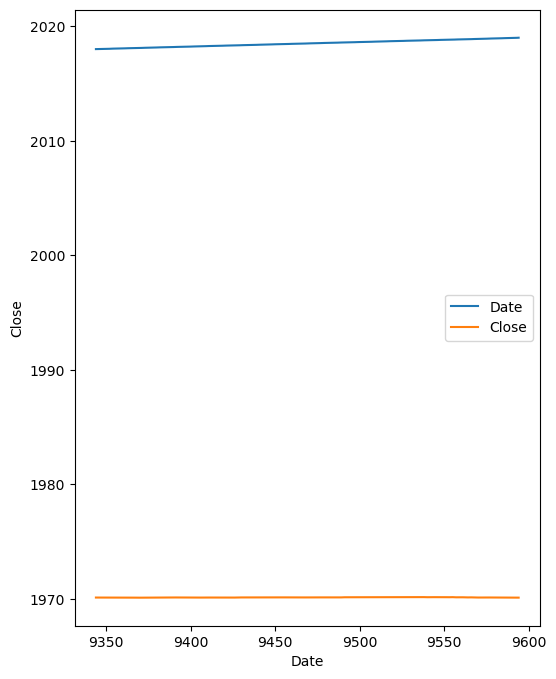

<Figure size 640x480 with 0 Axes>

In [349]:
apple_2018_chart = apple_2018_filtered.plot(kind='line', figsize=(6,8))

# Set the xlabel and ylabel using class methods
apple_2018_chart.set_xlabel("Date")
apple_2018_chart.set_ylabel("Close")

plt.show()
plt.tight_layout()

In [268]:
google_df = pd.read_csv("Resources/GOOG-year.csv")
google_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
3,2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
4,2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800


In [269]:
google_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2017-10-26,980.000000,987.599976,972.200012,972.559998,972.559998,2042100
248,2017-10-27,1009.190002,1048.390015,1008.200012,1019.270020,1019.270020,5167700
249,2017-10-30,1014.000000,1024.969971,1007.500000,1017.109985,1017.109985,2085100
250,2017-10-31,1015.219971,1024.000000,1010.419983,1016.640015,1016.640015,1330700
251,2017-11-01,1017.210022,1029.670044,1016.950012,1025.500000,1025.500000,1373444


In [270]:
google_predict = google_df[["Date", "Close"]]

# Rename the columns to the Prophet model syntax 
google_predict = google_predict.rename(columns={"Date":"ds", "Close":"y"})

# Review the Canada DataFrame
google_predict.head()

,ds,y
0,2016-11-02,768.700012
1,2016-11-03,762.130005
2,2016-11-04,762.020020
3,2016-11-07,782.520020
4,2016-11-08,790.510010


In [271]:
google_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: >

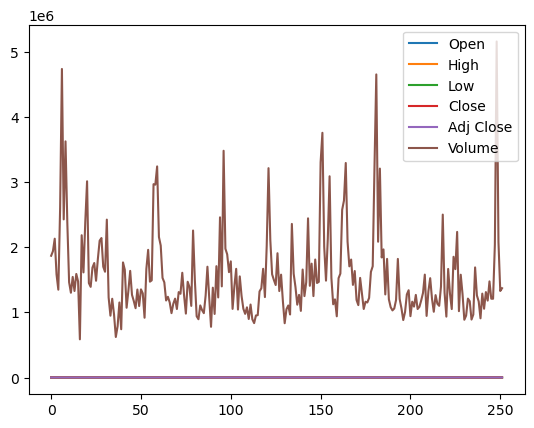

In [272]:
google_df.plot()

In [273]:
google_df.Date

0      2016-11-02
1      2016-11-03
2      2016-11-04
3      2016-11-07
4      2016-11-08
          ...    
247    2017-10-26
248    2017-10-27
249    2017-10-30
250    2017-10-31
251    2017-11-01
Name: Date, Length: 252, dtype: object

In [274]:
google_predict = google_df[["Date", "Close"]]

# Rename the columns to the Prophet model syntax 
google_predict = google_predict.rename(columns={"Date":"ds", "Close":"y"})

# Review the Canada DataFrame
google_predict.head()

,ds,y
0,2016-11-02,768.700012
1,2016-11-03,762.130005
2,2016-11-04,762.020020
3,2016-11-07,782.520020
4,2016-11-08,790.510010


In [275]:
model_google = Prophet()

In [276]:
model_google.fit(google_predict)

23:29:02 - cmdstanpy - INFO - Chain [1] start processing
23:29:02 - cmdstanpy - INFO - Chain [1] done processing


In [277]:
future_google = model_google.make_future_dataframe(periods=52, freq="W")
future_google.tail()

,ds
299,2018-09-30
300,2018-10-07
301,2018-10-14
302,2018-10-21
303,2018-10-28


In [278]:
forecast_google = model_google.predict(future_google)

forecast_google.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-02,759.529397,739.300677,779.463027,759.529397,759.529397,-0.143982,-0.143982,-0.143982,-0.143982,-0.143982,-0.143982,0.0,0.0,0.0,759.385415
1,2016-11-03,760.126835,739.832318,778.596538,760.126835,760.126835,-2.607331,-2.607331,-2.607331,-2.607331,-2.607331,-2.607331,0.0,0.0,0.0,757.519504
2,2016-11-04,760.724273,738.589166,779.611405,760.724273,760.724273,-1.109284,-1.109284,-1.109284,-1.109284,-1.109284,-1.109284,0.0,0.0,0.0,759.614989
3,2016-11-07,762.516588,741.390353,779.101588,762.516588,762.516588,-2.584549,-2.584549,-2.584549,-2.584549,-2.584549,-2.584549,0.0,0.0,0.0,759.932039
4,2016-11-08,763.114026,741.480534,782.254744,763.114026,763.114026,-1.117252,-1.117252,-1.117252,-1.117252,-1.117252,-1.117252,0.0,0.0,0.0,761.996774


In [279]:
google_plot_future = forecast_google[["ds", "yhat","yhat_lower","yhat_upper"]]
google_plot_future

,ds,yhat,yhat_lower,yhat_upper
0,2016-11-02,759.385415,739.300677,779.463027
1,2016-11-03,757.519504,739.832318,778.596538
2,2016-11-04,759.614989,738.589166,779.611405
3,2016-11-07,759.932039,741.390353,779.101588
4,2016-11-08,761.996774,741.480534,782.254744
...,...,...,...,...
299,2018-09-30,1362.238795,880.226953,1853.064858
300,2018-10-07,1369.860031,875.612041,1876.791909
301,2018-10-14,1377.481266,866.664706,1908.006855
302,2018-10-21,1385.102502,853.382910,1929.219414


<Axes: >

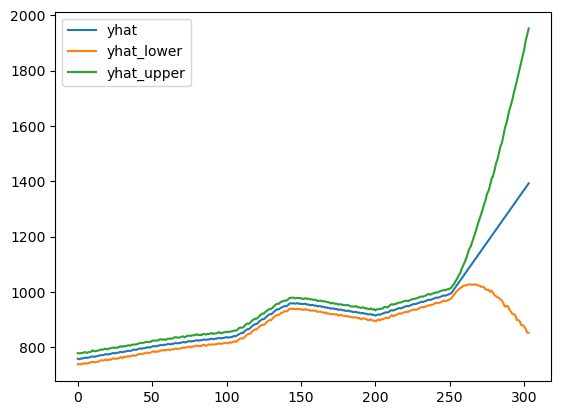

In [280]:
google_plot_future[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-720:,:].plot()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


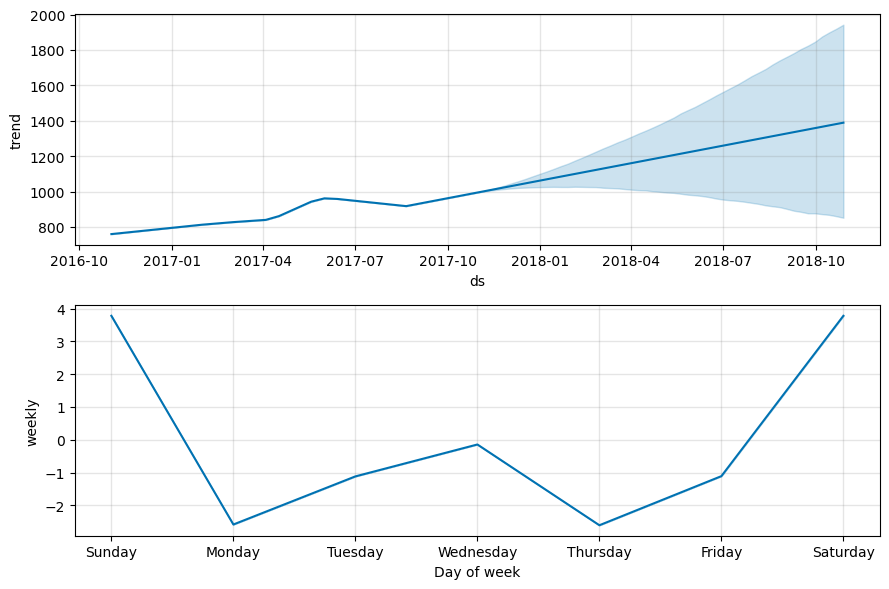

In [281]:
fig3 = model_google.plot_components(forecast_google)